In [1]:
import os
import zipfile

In [2]:
try:
    os.mkdir('./data')
except FileExistsError:
    pass

In [3]:
with zipfile.ZipFile('./chap9.zip') as z:
    z.extractall(path='./data/')

先安装jieba分词
```
pip install jieba
```

如果安装不成功，尝试使用pip的清华镜像源

```
pip install jieba -i https://pypi.tuna.tsinghua.edu.cn/simple
```

分词：tokenization

In [4]:
import jieba

In [5]:
s = "我爱北京天安门"

In [6]:
jieba.lcut(s)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\xh_z\AppData\Local\Temp\jieba.cache
Loading model cost 0.449 seconds.
Prefix dict has been built successfully.


['我', '爱', '北京', '天安门']

In [7]:
jieba.lcut(s)

['我', '爱', '北京', '天安门']

part of speech (pos) 

In [8]:
import jieba.posseg as psg

In [9]:
text = "我和同学一起去北京故宫玩"

In [10]:
psg.cut(text)

<generator object cut at 0x000001FE79563B30>

In [11]:
for ele in psg.cut(text):
    break

In [12]:
[x.word for x in psg.cut(text) if x.flag == 'ns']

['北京故宫']

In [13]:
str(ele)

'我/r'

词性标注简称查询表

https://github.com/fxsjy/jieba

<table>
<thead>
<tr>
<th>标签</th>
<th>含义</th>
<th>标签</th>
<th>含义</th>
<th>标签</th>
<th>含义</th>
<th>标签</th>
<th>含义</th>
</tr>
</thead>
<tbody>
<tr>
<td>n</td>
<td>普通名词</td>
<td>f</td>
<td>方位名词</td>
<td>s</td>
<td>处所名词</td>
<td>t</td>
<td>时间</td>
</tr>
<tr>
<td>nr</td>
<td>人名</td>
<td>ns</td>
<td>地名</td>
<td>nt</td>
<td>机构名</td>
<td>nw</td>
<td>作品名</td>
</tr>
<tr>
<td>nz</td>
<td>其他专名</td>
<td>v</td>
<td>普通动词</td>
<td>vd</td>
<td>动副词</td>
<td>vn</td>
<td>名动词</td>
</tr>
<tr>
<td>a</td>
<td>形容词</td>
<td>ad</td>
<td>副形词</td>
<td>an</td>
<td>名形词</td>
<td>d</td>
<td>副词</td>
</tr>
<tr>
<td>m</td>
<td>数量词</td>
<td>q</td>
<td>量词</td>
<td>r</td>
<td>代词</td>
<td>p</td>
<td>介词</td>
</tr>
<tr>
<td>c</td>
<td>连词</td>
<td>u</td>
<td>助词</td>
<td>xc</td>
<td>其他虚词</td>
<td>w</td>
<td>标点符号</td>
</tr>
<tr>
<td>PER</td>
<td>人名</td>
<td>LOC</td>
<td>地名</td>
<td>ORG</td>
<td>机构名</td>
<td>TIME</td>
<td>时间</td>
</tr>
</tbody>
</table>

**案例8-1**

In [14]:
from jieba import analyse

原始文本

In [15]:
text = '''很多人不知道的是，金庸开始武侠小说的创作，是一次很偶然的机会。
1955年，《大公报》下一个晚报有个武侠小说写得很成功的年轻人，和金庸
是同事，他名叫梁羽生。那年梁羽生的武侠小说即将完结，而他的创作又到
了疲惫期，于是，报纸总编辑邀请金庸将武侠小说继续写下去。虽然此前
从未写过小说，但凭借他对武侠小说的了解与喜爱，金庸还是答应接替梁羽生
的任务。他把自己名字中的镛字拆开，做了一个笔名，《书剑恩仇录》正是
他的第一部武侠作品，作品一炮而红。此书成功之后，金庸又在短短的几年
内创作了《碧血剑》《雪山飞狐》和《射雕英雄传》等作品，一时间风靡全港。
十余年间，他写下15部洋洋大作。
'''

基于TF-IDF算法进行关键词抽取<br>
topK表示最大抽取个数，默认为20个<br>
withWeight表示是否返回关键词权重值，默认值为 False<br>
还有一个参数allowPOS默认为('ns','n','vn','v')即仅提取地名、名词、动名词、动词

In [16]:
keywords = analyse.extract_tags(text, topK = 10, withWeight = True)

In [17]:
keywords

[('金庸', 0.6662278244583333),
 ('武侠小说', 0.6434306665833334),
 ('梁羽生', 0.49645277328571424),
 ('创作', 0.22376334877571424),
 ('作品', 0.21003803062785717),
 ('恩仇录', 0.16548425776190476),
 ('一炮而红', 0.16548425776190476),
 ('书剑', 0.15723250561190477),
 ('雪山飞狐', 0.15723250561190477),
 ('射雕', 0.14632428261309524)]

In [18]:
print ("keywords by tfidf:")
# 输出抽取出的关键词
for keyword in keywords:
    print ("{:<5} weight:{:4.2f}".format(keyword[0], keyword[1]))

keywords by tfidf:
金庸    weight:0.67
武侠小说  weight:0.64
梁羽生   weight:0.50
创作    weight:0.22
作品    weight:0.21
恩仇录   weight:0.17
一炮而红  weight:0.17
书剑    weight:0.16
雪山飞狐  weight:0.16
射雕    weight:0.15


关于TF-IDF的详细讲解 https://zhuanlan.zhihu.com/p/95358646

**案例8-2**

安装wordclound库

```
conda install -c conda-forge wordcloud
```

如果安装不成功，可参考教程
https://mirrors.tuna.tsinghua.edu.cn/help/anaconda/
使用清华源。

In [19]:
import wordcloud

In [20]:
import random
import string      # 导入string库

In [21]:
# string.ascii_uppercase可以获取所有的大写字母
lstChar = [x for x in string.ascii_uppercase]
# 使用randint获取26个随机整数
lstfreq = [random.randint(1,100) for i in range(26)]
# 使用字典生成式，产生形式如{'A': 80, 'B': 11, 'C': 38……}的字典
freq = {x[0]:x[1] for x in zip(lstChar,lstfreq)}

In [22]:
# freq

In [23]:
wcloud = wordcloud.WordCloud(
    background_color = "white",width=1000,
    max_words = 5,
    height = 860, margin = 1)

In [24]:
# wcloud.to_file("resultcloud.png")

In [25]:
wcloud

In [26]:
wcloud.fit_words(freq)

In [27]:
wcloud

In [28]:
wcloud.to_file("resultcloud.png")

In [29]:
print(freq)
wcloud = wordcloud.WordCloud(
    background_color = "white",width=1000,
    max_words = 50,
    height = 860, margin = 1).fit_words(freq)# 利用字典freq生成词云
wcloud.to_file("resultcloud.png")            # 将生成的词云图片保存
print('结束')

{'A': 23, 'B': 89, 'C': 41, 'D': 44, 'E': 55, 'F': 81, 'G': 83, 'H': 19, 'I': 12, 'J': 21, 'K': 8, 'L': 73, 'M': 65, 'N': 61, 'O': 77, 'P': 67, 'Q': 68, 'R': 69, 'S': 18, 'T': 7, 'U': 17, 'V': 42, 'W': 11, 'X': 22, 'Y': 47, 'Z': 19}
结束


**案例8-3**

安装networkx库

```
pip install networkx
```

In [30]:
import matplotlib.pyplot as plt        # 引入pyplot模块用于画图
import networkx as nx                   # 引入networkx用于生成关系网络

In [31]:
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示图中中文标签

In [32]:
G = nx.Graph()                             # 生成一张空的图

In [33]:
G.edges

EdgeView([])

In [34]:
lst = [['小花','明明',0.8],['小花','小灰',0.8],
       ['小花','小白',0.2],['小白','小灰',0.1], 
       ['小花','大李',0.4],['大李','小灰',0.8]]

In [35]:
for ii in lst:                           # 向图中添加边
    G.add_edge(ii[0], ii[1], weight = ii[2]) # 读入每条边的节点和权重

In [36]:
G.edges(data=True)

EdgeDataView([('小花', '明明', {'weight': 0.8}), ('小花', '小灰', {'weight': 0.8}), ('小花', '小白', {'weight': 0.2}), ('小花', '大李', {'weight': 0.4}), ('小灰', '小白', {'weight': 0.1}), ('小灰', '大李', {'weight': 0.8})])

In [37]:
# 将权重大于0.5的边添加到elarge列表中
elarge = [(u,v) 
          for (u,v,d) in G.edges(data=True) 
          if d['weight']>0.5]

In [39]:
# 将权重小于等于0.5的边添加到elarge列表中
esmall = [(u,v) 
          for (u,v,d) in G.edges(data=True) 
          if d['weight']<=0.5]

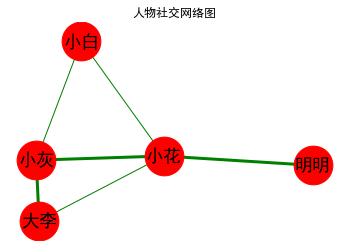

In [40]:
pos = nx.spring_layout(G) 
# 设置节点
nx.draw_networkx_nodes(G, pos, node_size = 1500, node_color='r')

# 设置边
nx.draw_networkx_edges(G,pos,edgelist=elarge,width=3,edge_color='g')

nx.draw_networkx_edges(G,pos,edgelist=esmall,width=1,edge_color='g')

# 设置图标标签
nx.draw_networkx_labels(G, pos, font_size = 18)
# 关闭图标坐标轴
plt.axis('off')
# 添加图表标题
plt.title("人物社交网络图")
# 显示所绘图表
plt.show() 

# 8.2 中文文本分析应用实例

## 8.2.1 数据准备

In [41]:
def getText(filepath):    # 传入待读取文件的文件名
    f = open(filepath, "r",encoding='utf-8')
    text = f.read()
    f.close()
    return text            # 返回读出的文本数据

In [42]:
text=getText('./data/hlm.txt')

In [43]:
# text

## 8.2.2 分析并统计词频

In [44]:
words  = jieba.lcut(text.strip())

In [95]:
print(words[:100])

['第', '1', '卷', '\n', '第一回', ' ', '甄士隐', '梦幻', '识通灵', ' ', '贾雨村', '风尘', '怀', '闺秀', '\n', '\u3000', '\u3000', '此', '开卷', '第一回', '也', '。', '作者', '自云', '：', '因曾', '历过', '一番', '梦幻', '之后', '，', '故', '将', '真事', '隐去', '，', '而', '借', '“', '通灵', '”', '之', '说', '，', '撰此', '<', '<', '石头记', '>', '>', '一书', '也', '。', '故曰', '“', '甄士隐', '”', '云云', '。', '但书中', '所记', '何事', '何人', '？', '自又云', '：', '“', '今', '风尘碌碌', '，', '一事无成', '，', '忽', '念及', '当日', '所有', '之', '女子', '，', '一一', '细考', '较', '去', '，', '觉其', '行止', '见识', '，', '皆', '出于', '我', '之上', '。', '何', '我', '堂堂', '须眉', '，', '诚不若', '彼']


In [46]:
import jieba
def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]  
    return stopwords

In [47]:
def wordFreq(filepath,text,topn):
    words  = jieba.lcut(text.strip())
    counts = {}
    stopwords = stopwordslist('./data/stop_words.txt')
    for word in words:
        if len(word) == 1:
            continue
        elif word not in stopwords:  
            if word == "凤姐儿" :
                word="凤姐"
            elif word=="林黛玉" or word=="林妹妹" or word=="黛玉笑":
                word="黛玉"
            elif word == "宝二爷":
                word="宝玉"
            elif word == "袭人道":
                word="袭人"
            counts[word] = counts.get(word,0) + 1        
    items = list(counts.items())
    items.sort(key = lambda x:x[1], reverse = True)
    f = open(filepath[:-4]+'_freq.txt', "w")
    for i in range(topn):
        word, count = items[i]
        f.writelines("{}\t{}\n".format(word, count))
    f.close()

In [48]:
wordFreq('./data/hlm.txt', text, 300)

In [49]:
print('统计结束')

统计结束


## 8.2.3 制作词云

In [50]:
import matplotlib.pyplot as plt
import wordcloud
from imageio import imread

In [51]:
bg_pic = imread('./data/star.jpg')  # 读入形状图片

In [52]:
# bg_pic

In [53]:
f = open("./data/hlm_freq.txt",'r')
text = f.read()
f.close()

In [54]:
# text

In [55]:
wcloud=wordcloud.WordCloud(font_path = 'C:/Windows/Fonts/simhei.ttf',
                           background_color = "white",width=1000,
                           max_words = 500,
                           mask = bg_pic, # mask参数设置词云形状
                           height = 860, margin = 2).generate(text)

In [56]:
wcloud.to_file("hlm_cloud_star.png")   # 保存图片

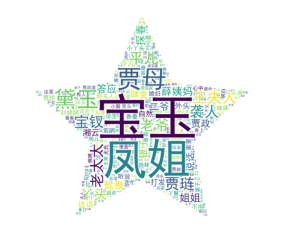

In [57]:
#  显示词云图片
plt.imshow(wcloud)
plt.axis('off')
plt.show()

## 8.2.4 章回处理

In [58]:
import re

In [59]:
#分割章回
f = open('./data/hlm.txt','r',encoding='utf-8') 
s = f.read()
f.close()

In [60]:
s[:100]

'第1卷\n第一回 甄士隐梦幻识通灵 贾雨村风尘怀闺秀\n\u3000\u3000此开卷第一回也。作者自云：因曾历过一番梦幻之后，故将真事隐去，而借“通灵”之说，撰此<<石头记>>一书也。故曰“甄士隐”云云。但书中所记何事何人'

In [61]:
chapter = re.findall("第[\u4E00-\u9FA5]+回", s)#"第([\u4E00-\u9FA5]+)回"返回第和回中间的内容

In [62]:
chapter

['第一回',
 '第一回',
 '第二回',
 '第三回',
 '第四回',
 '第五回',
 '第四回',
 '第六回',
 '第七回',
 '第八回',
 '第九回',
 '第十回',
 '第十一回',
 '第十二回',
 '第十三回',
 '第十四回',
 '第十五回',
 '第十六回',
 '第十七回',
 '第十八回',
 '第十九回',
 '第二十回',
 '第二十一回',
 '第二十二回',
 '第二十三回',
 '第二十四回',
 '第二十五回',
 '第二十六回',
 '第二十七回',
 '第二十八回',
 '第二十九回',
 '第三十回',
 '第三十一回',
 '第三十二回',
 '第三十三回',
 '第三十四回',
 '第三十五回',
 '第三十六回',
 '第三十七回',
 '第三十八回',
 '第三十九回',
 '第四十回',
 '第四十一回',
 '第二回',
 '第四十二回',
 '第四十三回',
 '第四十四回',
 '第四十五回',
 '第四十六回',
 '第四十七回',
 '第四十八回',
 '第四十九回',
 '第五十回',
 '第五十一回',
 '第五十二回',
 '第五十三回',
 '第五十四回',
 '第五十五回',
 '第五十六回',
 '第五十七回',
 '第五十八回',
 '第五十九回',
 '第六十回',
 '第六十一回',
 '第六十二回',
 '第六十三回',
 '第六十四回',
 '第六十五回',
 '第六十六回',
 '第六十七回',
 '第六十八回',
 '第六十九回',
 '第七十回',
 '第七十一回',
 '第七十二回',
 '第七十三回',
 '第七十四回',
 '第七十五回',
 '第七十六回',
 '第七十七回',
 '第七十八回',
 '第七十九回',
 '第八十回',
 '第八十一回',
 '第八十二回',
 '第八十三回',
 '第八十四回',
 '第八十五回',
 '第五出是达摩带着徒弟过江回',
 '第八十六回',
 '第八十七回',
 '第八十八回',
 '第八十九回',
 '第九十回',
 '第九十一回',
 '第九十二回',
 '第九十三回',
 '第九十四回',
 '第九十五回',
 '第九十六回',
 '第九十七回',
 '第九十八回',
 '第九十九回',
 '第一零

In [63]:
lst_chapter = []
for x in chapter:
    if x not in lst_chapter and len(x)<=5:
        lst_chapter.append(x)
print(lst_chapter)

['第一回', '第二回', '第三回', '第四回', '第五回', '第六回', '第七回', '第八回', '第九回', '第十回', '第十一回', '第十二回', '第十三回', '第十四回', '第十五回', '第十六回', '第十七回', '第十八回', '第十九回', '第二十回', '第二十一回', '第二十二回', '第二十三回', '第二十四回', '第二十五回', '第二十六回', '第二十七回', '第二十八回', '第二十九回', '第三十回', '第三十一回', '第三十二回', '第三十三回', '第三十四回', '第三十五回', '第三十六回', '第三十七回', '第三十八回', '第三十九回', '第四十回', '第四十一回', '第四十二回', '第四十三回', '第四十四回', '第四十五回', '第四十六回', '第四十七回', '第四十八回', '第四十九回', '第五十回', '第五十一回', '第五十二回', '第五十三回', '第五十四回', '第五十五回', '第五十六回', '第五十七回', '第五十八回', '第五十九回', '第六十回', '第六十一回', '第六十二回', '第六十三回', '第六十四回', '第六十五回', '第六十六回', '第六十七回', '第六十八回', '第六十九回', '第七十回', '第七十一回', '第七十二回', '第七十三回', '第七十四回', '第七十五回', '第七十六回', '第七十七回', '第七十八回', '第七十九回', '第八十回', '第八十一回', '第八十二回', '第八十三回', '第八十四回', '第八十五回', '第八十六回', '第八十七回', '第八十八回', '第八十九回', '第九十回', '第九十一回', '第九十二回', '第九十三回', '第九十四回', '第九十五回', '第九十六回', '第九十七回', '第九十八回', '第九十九回', '第一零零回', '第一零一回', '第一零二回', '第一零三回', '第一零四回', '第一零五回', '第一零六回', '第一零七回', '第一零八回', '第一零九回', '第一一零回', '第一一一回', '第一一二回', '第一一三回', '第一一四回', '第一一五回', '

In [64]:
s.index('九回')

57681

In [65]:
lst_start_chapterindex = []
for x in lst_chapter:
     lst_start_chapterindex.append(s.index(x))
print(lst_start_chapterindex)

[4, 7948, 13939, 22556, 28563, 36260, 43634, 51051, 57680, 63344, 68436, 74332, 78593, 83748, 89359, 94411, 102122, 109920, 118394, 127530, 132830, 138861, 145865, 151362, 159854, 167996, 175320, 181750, 191210, 199847, 205609, 212828, 218688, 223447, 230699, 238545, 245350, 254530, 260270, 266638, 276000, 282537, 290091, 296806, 303487, 311238, 319456, 326733, 333371, 340699, 347600, 354564, 362870, 371022, 379809, 387913, 396621, 407811, 414805, 419818, 427315, 433926, 445727, 456805, 466422, 473306, 478394, 487664, 495091, 502307, 508783, 517740, 525264, 532741, 543745, 553297, 560802, 571345, 582188, 586971, 593830, 600724, 609197, 617311, 625036, 633067, 639796, 646464, 653197, 659275, 665485, 670913, 677977, 684498, 692805, 699421, 706169, 716074, 721989, 727989, 733618, 741584, 746502, 753410, 759653, 765077, 770809, 777088, 784147, 793271, 799999, 807289, 814313, 821300, 826286, 833251, 840143, 847769, 855342, 864887]


In [66]:
lst_end_chapterindex = lst_start_chapterindex[1:]+[len(s)]
lst_chapterindex=list(zip(lst_start_chapterindex,lst_end_chapterindex))
print(lst_chapterindex)

[(4, 7948), (7948, 13939), (13939, 22556), (22556, 28563), (28563, 36260), (36260, 43634), (43634, 51051), (51051, 57680), (57680, 63344), (63344, 68436), (68436, 74332), (74332, 78593), (78593, 83748), (83748, 89359), (89359, 94411), (94411, 102122), (102122, 109920), (109920, 118394), (118394, 127530), (127530, 132830), (132830, 138861), (138861, 145865), (145865, 151362), (151362, 159854), (159854, 167996), (167996, 175320), (175320, 181750), (181750, 191210), (191210, 199847), (199847, 205609), (205609, 212828), (212828, 218688), (218688, 223447), (223447, 230699), (230699, 238545), (238545, 245350), (245350, 254530), (254530, 260270), (260270, 266638), (266638, 276000), (276000, 282537), (282537, 290091), (290091, 296806), (296806, 303487), (303487, 311238), (311238, 319456), (319456, 326733), (326733, 333371), (333371, 340699), (340699, 347600), (347600, 354564), (354564, 362870), (362870, 371022), (371022, 379809), (379809, 387913), (387913, 396621), (396621, 407811), (407811, 4

In [67]:
len(lst_chapterindex)

120

In [68]:
#计算每回刘姥姥出现次数
cnt_liulaolao=[]
for ii in range(120):
    start=lst_chapterindex[ii][0]
    end=lst_chapterindex[ii][1]
    cnt_liulaolao.append(s[start:end].count("刘姥姥"))

In [69]:
# cnt_liulaolao

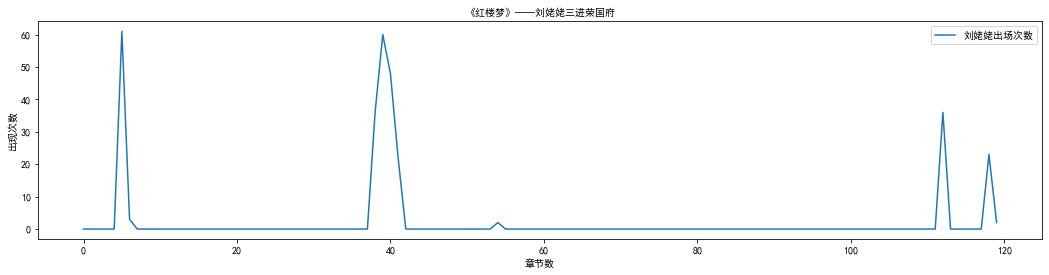

In [70]:
#刘姥姥三进荣国府
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.figure(figsize=(18,4))
plt.plot(cnt_liulaolao, label="刘姥姥出场次数")
plt.xlabel("章节数", fontproperties='SimHei')
plt.ylabel("出现次数", fontproperties='SimHei')
plt.legend()
plt.title("《红楼梦》——刘姥姥三进荣国府", fontproperties='SimHei')
plt.show()

In [71]:
#计算每回苦笑悲喜次数
cnt_laugh=[]
cnt_cry=[]
for ii in range(120):
    start=lst_chapterindex[ii][0]
    end=lst_chapterindex[ii][1]
    cnt_laugh.append(s[start:end].count("笑")+s[start:end].count("喜"))
    cnt_cry.append(s[start:end].count("哭")+s[start:end].count("悲"))

In [72]:
#画悲喜图
import matplotlib.pyplot as plt

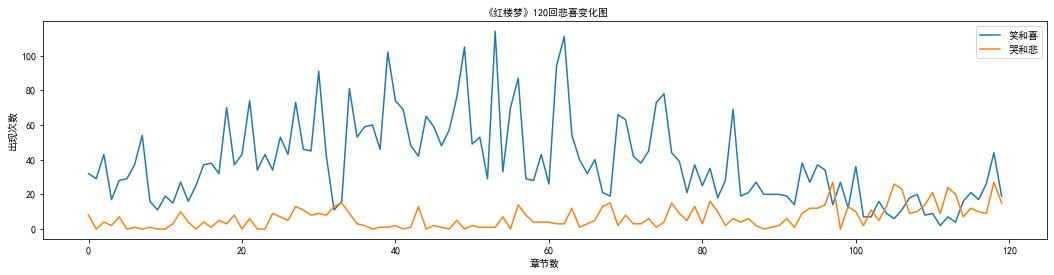

In [73]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.figure(figsize=(18,4))
plt.plot(cnt_laugh,label="笑和喜")
plt.plot(cnt_cry,label="哭和悲")
plt.xlabel("章节数", fontproperties='SimHei')
plt.ylabel("出现次数", fontproperties='SimHei')
plt.legend()
plt.title("《红楼梦》120回悲喜变化图", fontproperties='SimHei')
plt.show()

In [74]:
#计算每一回含有多少段、多少字
cnt_chap=[]
cnt_word=[]
for ii in range(120):
    start=lst_chapterindex[ii][0]
    end=lst_chapterindex[ii][1]
    cnt_chap.append(s[start:end].count("\n"))
    cnt_word.append(len(s[start:end]))

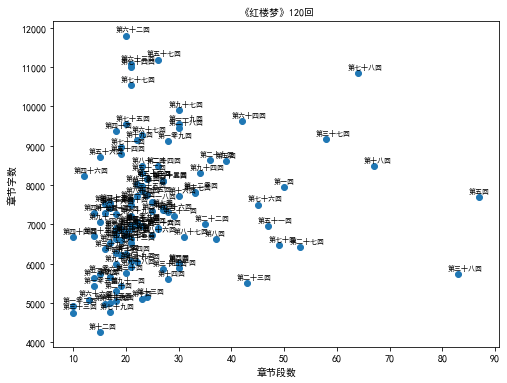

In [75]:
## 字长和段落数的散点图
plt.figure(figsize=(8,6))
plt.scatter(cnt_chap, cnt_word)
for ii in range(120):
    plt.text(cnt_chap[ii]-2, cnt_word[ii]+100, lst_chapter[ii], fontproperties='SimHei', size=7)
plt.xlabel("章节段数",  fontproperties='SimHei')
plt.ylabel("章节字数", fontproperties='SimHei')
plt.title("《红楼梦》120回", fontproperties='SimHei')
plt.show()

In [76]:
# 生成人物关系权重
Names=['宝玉','凤姐','贾母','黛玉','王夫人','老太太','袭人','贾琏','平儿','宝钗','薛姨妈','探春','鸳鸯',
       '贾政','晴雯','湘云','刘姥姥','邢夫人','贾珍','紫鹃','香菱','尤氏','薛蟠','贾赦']

<!-- occurrence  -->

In [77]:
# Names

In [78]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib

In [79]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
lst_para=s.split('\n') #按段落划分，假设在同一段落中出现的人物具有共现关系

In [80]:
len(lst_para)

3056

In [81]:
lst_para[2]

'\u3000\u3000此开卷第一回也。作者自云：因曾历过一番梦幻之后，故将真事隐去，而借“通灵”之说，撰此<<石头记>>一书也。故曰“甄士隐”云云。但书中所记何事何人？自又云：“今风尘碌碌，一事无成，忽念及当日所有之女子，一一细考较去，觉其行止见识，皆出于我之上。何我堂堂须眉，诚不若彼裙钗哉？实愧则有余，悔又无益之大无可如何之日也！当此，则自欲将已往所赖天恩祖德，锦衣纨э之时，饫甘餍肥之日，背父兄教育之恩，负师友规谈之德，以至今日一技无成，半生潦倒之罪，编述一集，以告天下人：我之罪固不免，然闺阁中本自历历有人，万不可因我之不肖，自护己短，一并使其泯灭也。虽今日之茅椽蓬牖，瓦灶绳床，其晨夕风露，阶柳庭花，亦未有妨我之襟怀笔墨者。虽我未学，下笔无文，又何妨用假语村言，敷演出一段故事来，亦可使闺阁昭传，复可悦世之目，破人愁闷，不亦宜乎？”故曰“贾雨村”云云。'

In [82]:
relations={}
for text in lst_para:
    for name1 in Names:
        if name1 in text:
            for name2 in Names:
                if name2 in text and name1!=name2 and (name2,name1) not in relations:
                    relations[(name1,name2)]=relations.get((name1,name2),0)+1
             

In [83]:
# print(relations.items())

In [84]:
maxRela=max([v for k,v in relations.items()])

In [85]:
maxRela

349

In [86]:
relations={k:v/maxRela for k,v in relations.items()}

In [87]:
# relations

In [88]:
print(relations.items(), maxRela)

dict_items([(('宝玉', '贾政'), 0.49283667621776506), (('宝玉', '贾珍'), 0.1489971346704871), (('宝玉', '贾赦'), 0.11461318051575932), (('贾政', '贾珍'), 0.1346704871060172), (('贾政', '贾赦'), 0.166189111747851), (('贾珍', '贾赦'), 0.10601719197707736), (('黛玉', '老太太'), 0.2693409742120344), (('贾母', '黛玉'), 0.4154727793696275), (('贾母', '贾政'), 0.34097421203438394), (('贾母', '贾赦'), 0.16332378223495703), (('黛玉', '贾政'), 0.07736389684813753), (('黛玉', '贾赦'), 0.02865329512893983), (('贾母', '贾琏'), 0.2148997134670487), (('黛玉', '贾琏'), 0.045845272206303724), (('贾琏', '贾赦'), 0.12320916905444126), (('贾母', '王夫人'), 0.7908309455587392), (('贾母', '老太太'), 0.6275071633237822), (('贾母', '邢夫人'), 0.22922636103151864), (('黛玉', '王夫人'), 0.2922636103151863), (('黛玉', '邢夫人'), 0.045845272206303724), (('王夫人', '老太太'), 0.45558739255014324), (('王夫人', '邢夫人'), 0.2922636103151863), (('王夫人', '贾赦'), 0.10315186246418338), (('老太太', '邢夫人'), 0.15472779369627507), (('老太太', '贾赦'), 0.07736389684813753), (('邢夫人', '贾赦'), 0.09169054441260745), (('王夫人', '贾政'), 0.31

In [89]:
plt.figure(figsize=(15,15))
G=nx.Graph()

<Figure size 1080x1080 with 0 Axes>

In [90]:
for k,v in relations.items():
    G.add_edge(k[0],k[1],weight = v)

In [91]:
elarge=[(u,v) for (u,v,d) in G.edges(data=True)
        if d['weight'] >0.6]

emidle = [(u,v) for (u,v,d) in G.edges(data=True)
          if (d['weight'] >0.3) & (d['weight'] <= 0.6)]

esmall=[(u,v) for (u,v,d) in G.edges(data=True)
        if d['weight'] <=0.3]

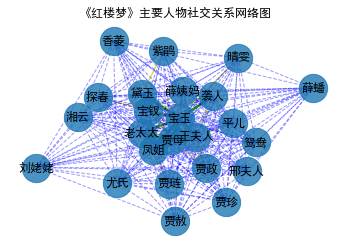

In [92]:
pos=nx.spring_layout(G) 
nx.draw_networkx_nodes(G,pos,alpha=0.8,node_size= 800)

nx.draw_networkx_edges(G,pos,edgelist=elarge,width=2.5,
                       alpha=0.9,edge_color='g')

nx.draw_networkx_edges(G,pos,edgelist=emidle,width=1.5,
                       alpha=0.6,edge_color='y')

nx.draw_networkx_edges(G,pos,edgelist=esmall,width=1,
                       alpha=0.4,edge_color='b',style='dashed')

nx.draw_networkx_labels(G,pos,font_size= 12)
plt.axis('off')
plt.title("《红楼梦》主要人物社交关系网络图")
plt.show()

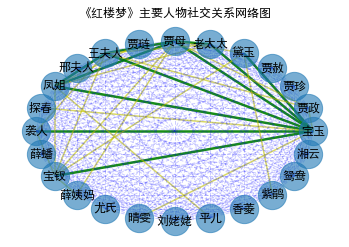

In [93]:
#布局模型
pos=nx.circular_layout(G)
nx.draw_networkx_nodes(G,pos,alpha=0.6,node_size = 800)
#alpha是透明度，width是连接线的宽度
nx.draw_networkx_edges(G,pos,edgelist=elarge,width=2.5,
                       alpha=0.9,edge_color='g')
nx.draw_networkx_edges(G,pos,edgelist=emidle,width=1.5,
                       alpha=0.6,edge_color='y')
nx.draw_networkx_edges(G,pos,edgelist=esmall,width=1,
                       alpha=0.2,edge_color='b',style='dashed')
nx.draw_networkx_labels(G,pos,font_size=12)
plt.axis('off')
plt.title("《红楼梦》主要人物社交关系网络图")
plt.show()